# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [26]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [28]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [29]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [30]:
# Extract all rows of data
# Find the table in the HTML
mars_table = weather_soup.find('table', class_='table')

# Print the table HTML to inspect the structure (optional)
print(mars_table.prettify())

rows = mars_table.find_all('tr')

<table class="table">
 <tbody>
  <tr>
   <th>
    id
   </th>
   <th>
    terrestrial_date
   </th>
   <th>
    sol
   </th>
   <th>
    ls
   </th>
   <th>
    month
   </th>
   <th>
    min_temp
   </th>
   <th>
    pressure
   </th>
  </tr>
  <tr class="data-row">
   <td>
    2
   </td>
   <td>
    2012-08-16
   </td>
   <td>
    10
   </td>
   <td>
    155
   </td>
   <td>
    6
   </td>
   <td>
    -75.0
   </td>
   <td>
    739.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    13
   </td>
   <td>
    2012-08-17
   </td>
   <td>
    11
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    740.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    24
   </td>
   <td>
    2012-08-18
   </td>
   <td>
    12
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    741.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    35
   </td>
   <td>
    2012-08-19
   </td>
   <td>
    13
   </td>
   <td>
   

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the text in each cell (both header and data cells)
    cells = row.find_all(['th', 'td'])
    cell_values = [cell.get_text() for cell in cells]
    
    # Append the extracted data to the list
    mars_weather_data.append(cell_values)

# Print the extracted data to verify
mars_weather_data

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [32]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_weather_data[1:], columns=mars_weather_data[0])


In [33]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [34]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [35]:
# Change data types for data analysis

# Convert the date column to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert numerical columns to float or integer as needed
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

In [36]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [37]:
# 1. How many months are there on Mars?
# From the 'terrestrial_month' column in datetime format, we can extract the month
mars_weather_df['month'] = mars_weather_df['terrestrial_date'].dt.month

# Check how many unique months exist in the dataset
num_months = mars_weather_df['month'].nunique()
num_months

12

In [38]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
num_sols

1867

In [73]:
# 3. What is the average minimum temperature by month?
# Group by 'month' and calculate the average of 'min_temp'
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result
avg_min_temp_by_month

month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

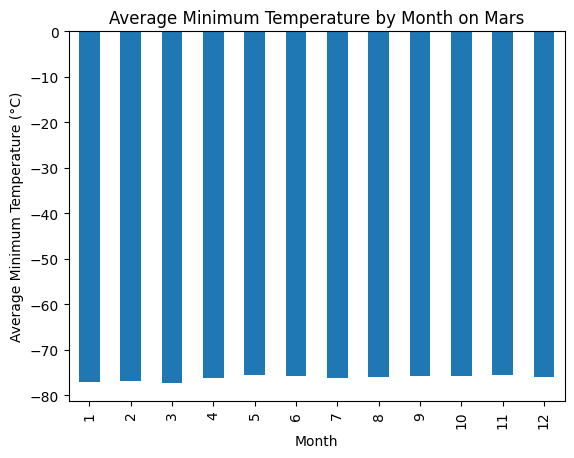

In [68]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar')

# Add labels and title
plt.ylabel('Average Minimum Temperature (°C)')
plt.xlabel('Month')
plt.title('Average Minimum Temperature by Month on Mars')

# Display the plot
plt.show()


In [54]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Display the sorted result
sorted_min_temp_by_month

month
3    -77.349206
1    -76.988506
2    -76.909091
7    -76.177305
4    -76.098592
12   -75.994220
8    -75.851613
9    -75.816092
10   -75.685083
6    -75.671233
5    -75.573427
11   -75.537975
Name: min_temp, dtype: float64

In [51]:
# 4. What is the average pressure by month?
# Group by 'month' and calculate the average of 'pressure'
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Find the month with the lowest and highest average pressure
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

avg_min_temp_by_month, lowest_pressure_month, highest_pressure_month



(month
 1    -76.988506
 2    -76.909091
 3    -77.349206
 4    -76.098592
 5    -75.573427
 6    -75.671233
 7    -76.177305
 8    -75.851613
 9    -75.816092
 10   -75.685083
 11   -75.537975
 12   -75.994220
 Name: min_temp, dtype: float64,
 np.int32(5),
 np.int32(11))

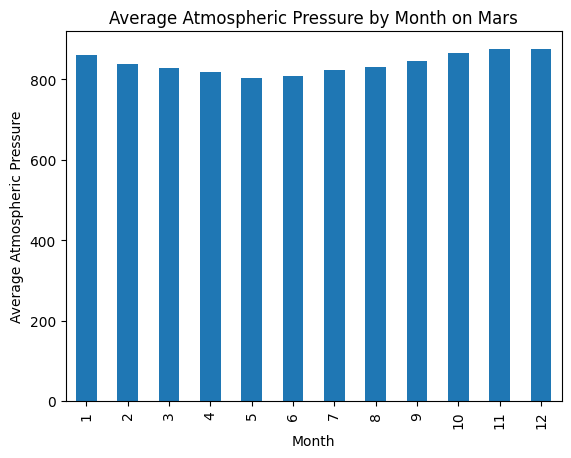

In [67]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar')

# Add labels and title
plt.ylabel('Average Atmospheric Pressure')
plt.xlabel('Month')
plt.title('Average Atmospheric Pressure by Month on Mars')

# Display the plot
plt.show()

In [53]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average pressure by month in ascending order
sorted_pressure_by_month = avg_pressure_by_month.sort_values()

# Display the sorted result
sorted_pressure_by_month

month
5     803.601399
6     807.910959
4     817.676056
7     822.510638
3     827.722222
8     829.606452
2     837.967532
9     845.586207
1     861.258621
10    865.475138
12    875.260116
11    875.481013
Name: pressure, dtype: float64

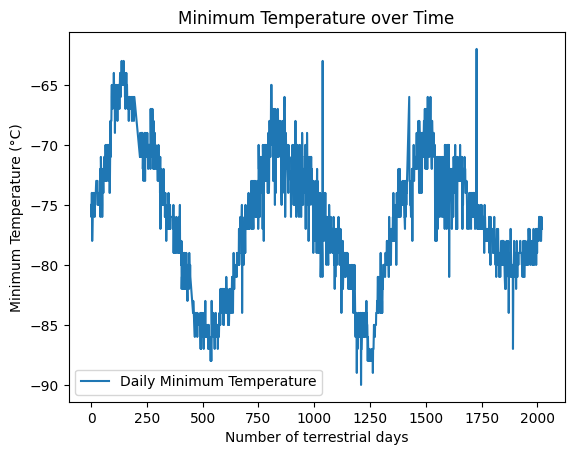

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Calculate the number of days since the first terrestrial date
mars_weather_df['days_since_start'] = (mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()).dt.days

# Plot the minimum temperature over the number of terrestrial days
plt.plot(mars_weather_df['days_since_start'], mars_weather_df['min_temp'], label='Daily Minimum Temperature')

# Add labels and title
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Time')
plt.legend()

# Display the plot
plt.show()



#### Minimum Temperature

- The minimum temperature on Mars exhibits a clear seasonal pattern, with cyclic fluctuations visible over time. This is indicative of how Mars experiences seasons, much like Earth, as it orbits the Sun.
- The coldest months appear to coincide with certain points in Mars’ orbit where it is farther from the Sun (aphelion), resulting in lower temperatures. Conversely, the warmest months occur when Mars is closer to the Sun (perihelion), leading to slightly higher temperatures, though still extremely cold relative to Earth.

#### Atmospheric Pressure

- Pressure values fluctuate between approximately 700 Pa and 900 Pa throughout the Martian year. These changes are much more extreme compared to Earth, where sea-level pressure averages around 101,325 Pa.
- The months with the lowest atmospheric pressure coincide with the Martian winter in the hemisphere where Curiosity is located. During this time, large amounts of CO2 freeze out of the atmosphere and deposit as ice on the polar ice caps, significantly lowering the pressure.
- Understanding the fluctuations in atmospheric pressure is essential for spacecraft entry, descent, and landing (EDL) on Mars. The lower the atmospheric pressure, the more difficult it is for parachutes to slow down a spacecraft, and this must be accounted for in mission designs.

#### Year Length

- By plotting the daily minimum temperature data over time, we can observe clear seasonal temperature cycles. These cycles repeat approximately every 687 Earth days, confirming the length of a Martian year. 
- The extended length of the Martian year is critical for mission design and operation. Future crewed missions to Mars will need to consider how the long seasons impact temperatures, radiation exposure, and resource use.
- Robotic missions, such as the Curiosity rover, must account for the long winters and lower energy production during these times due to less sunlight for solar panels, as well as colder temperatures that affect equipment operation.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)


In [47]:
browser.quit()